In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()


<Figure size 640x480 with 0 Axes>

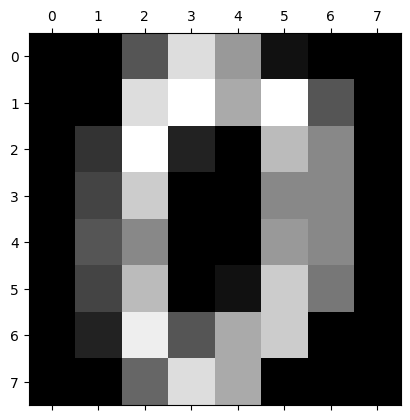

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()



Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        88
           1       0.84      0.64      0.72        91
           2       0.83      0.69      0.75        86
           3       0.71      0.74      0.72        91
           4       0.80      0.79      0.80        92
           5       0.60      0.75      0.66        91
           6       0.83      0.88      0.86        91
           7       0.86      0.81      0.83        89
           8       0.62      0.64      0.63        88
           9       0.65      0.72      0.68        92

    accuracy                           0.76       899
   macro avg       0.77      0.76      0.76       899
weighted avg       0.76      0.76      0.76       899



Accuracy of the Algorithm:  0.7552836484983315


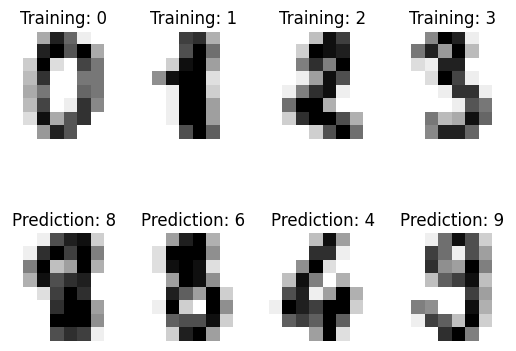

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
predicted = dt_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (dt_classifier, metrics.classification_report(y_test, predicted)))


print("\nAccuracy of the Algorithm: ", dt_classifier.score(X_test, y_test))
plt.show()


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Accuracy of the Algorithm:  0.9688542825361512


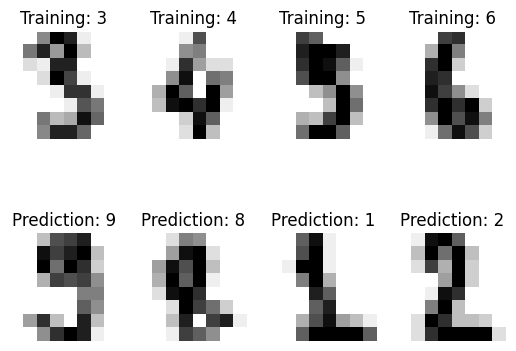

In [ ]:
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001)
svm_classifier.fit(X_train, y_train)
predicted = svm_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[3:20]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[6:20]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (svm_classifier, metrics.classification_report(y_test, predicted)))
print("\nAccuracy of the Algorithm: ", svm_classifier.score(X_test, y_test))
plt.show()

11490434/11490434 [==============================] - 0s 0us/step


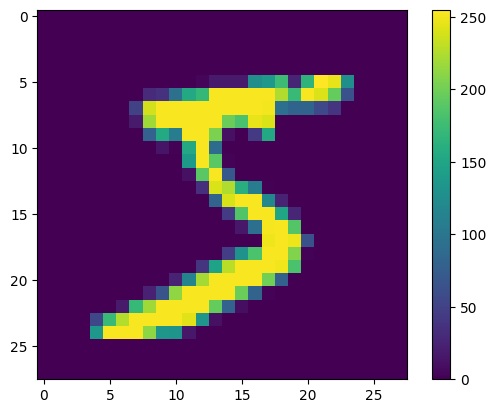

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.2590 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1143 - accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0763 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0575 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0436 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0338 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0174 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

'2'

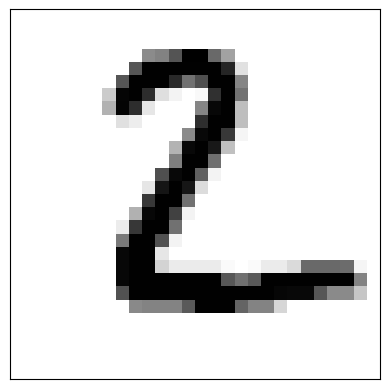

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist=tf.keras.datasets.mnist
(train_images,train_labels), (test_images, test_labels)=mnist.load_data()


class_names = ['0','1','2','3','4','5','6','7','8','9']

train_images.shape
len(train_labels)
train_labels

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

#creating model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])



img = test_images[1]
print(img.shape)

plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap=plt.cm.binary)
plt.grid(False)



img = (np.expand_dims(img,0))
print(img.shape)


predictions_single = probability_model.predict(img)

print(predictions_single)

r=np.argmax(predictions_single[0])
class_names[r]